`monitoring` binary classification example (adult dataset)
-----

### Load packages

In [1]:
from transparentai import monitoring
from transparentai.datasets import load_adult

from datetime import datetime, timedelta
import random 
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_adult()
X, Y = data.drop(columns='income'), data['income']

In [3]:
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})

Split train test

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Create fake timestamp prediction data

In [6]:
timestamp = [datetime.today() - timedelta(days=random.randint(0, 600)) for i in range(len(Y))]
timestamp = pd.Series(timestamp, name='timestamp')

Prepare param

In [7]:
y_true = Y
y_pred = clf.predict_proba(X)

### Use `monitoring.monitor_model` 

In [8]:
monitoring.monitor_model(y_true, y_pred, timestamp, interval='month', classification=True)

,accuracy,f1,precision,recall,count
2018-09,0.939000,0.868817,0.885965,0.852321,1000
2018-10,0.936645,0.866337,0.894378,0.840000,2557
2018-11,0.942135,0.879572,0.899635,0.860384,2333
2018-12,0.936441,0.864643,0.881271,0.848631,2596
2019-01,0.944309,0.877569,0.892727,0.862917,2460
2019-02,0.927530,0.847885,0.880374,0.817708,2332
2019-03,0.942109,0.875850,0.901926,0.851240,2522
2019-04,0.937906,0.862780,0.882569,0.843860,2464
2019-05,0.935548,0.861747,0.889667,0.835526,2529
2019-06,0.939916,0.871749,0.895028,0.849650,2380


In [11]:
monitoring.monitor_model(y_true, y_pred, timestamp, interval='year', classification=True)

,accuracy,f1,precision,recall,count
2018,0.938369,0.869803,0.890872,0.849708,8486
2019,0.936635,0.864101,0.889878,0.839776,29764
2020,0.937217,0.863646,0.882649,0.845444,10592


### Use `monitoring.plot_monitoring`

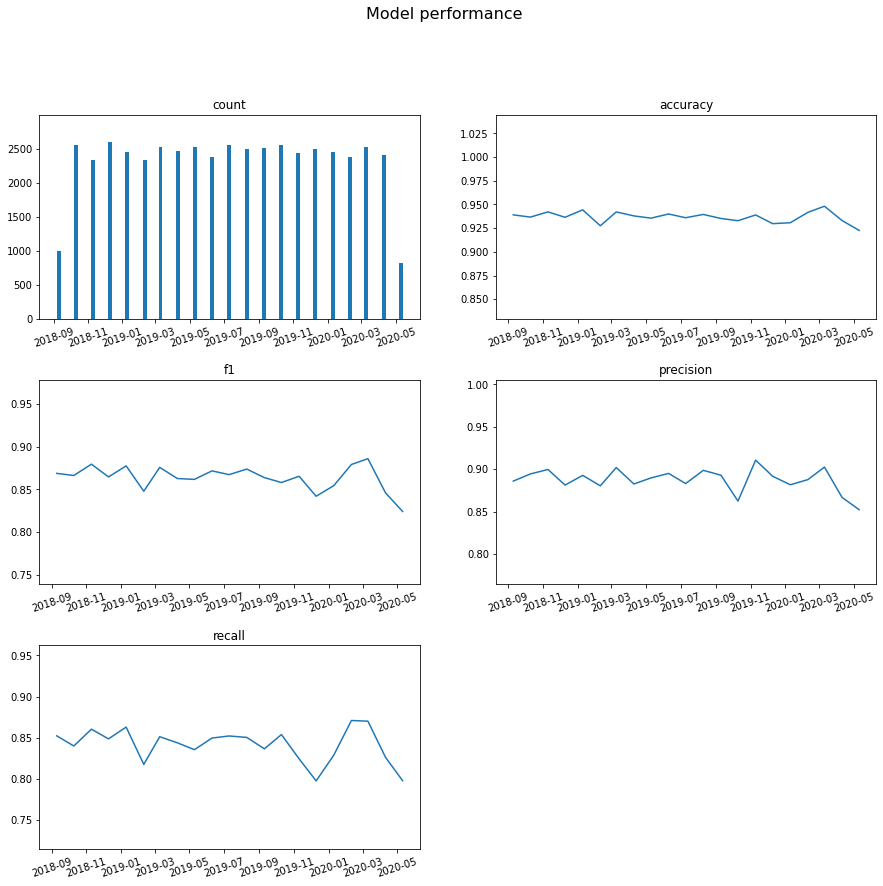

In [9]:
monitoring.plot_monitoring(y_true, y_pred, timestamp, interval='month', classification=True)

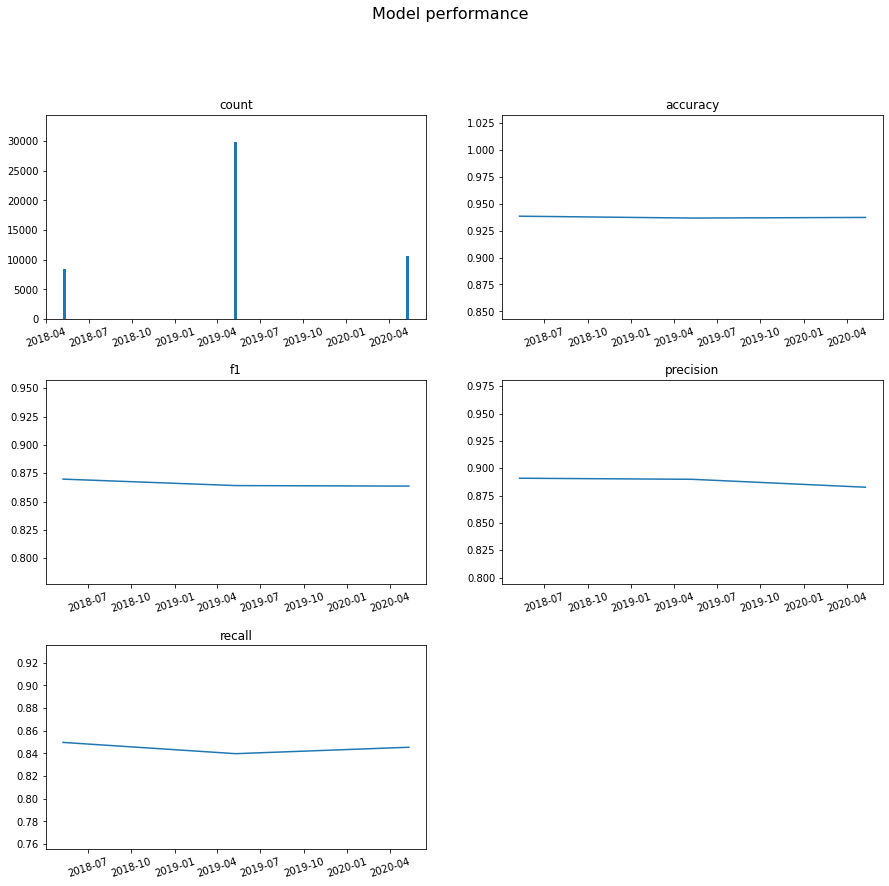

In [10]:
monitoring.plot_monitoring(y_true, y_pred, timestamp, interval='year', classification=True)